# Data

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Continuous Variables

## histogram

<AxesSubplot:xlabel='age', ylabel='Count'>

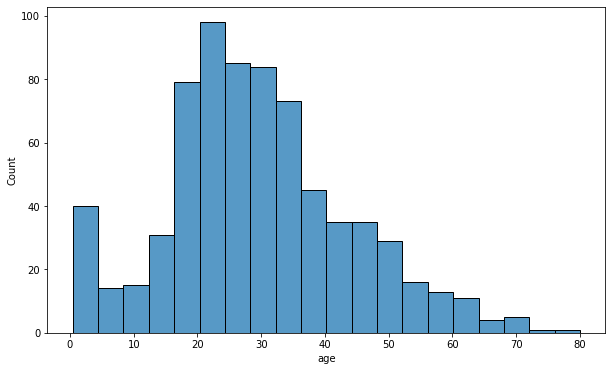

In [4]:
sns.histplot(x = 'age', data = data)

**구간 개수 지정**
- bins 옵션 이용

<AxesSubplot:xlabel='age', ylabel='Count'>

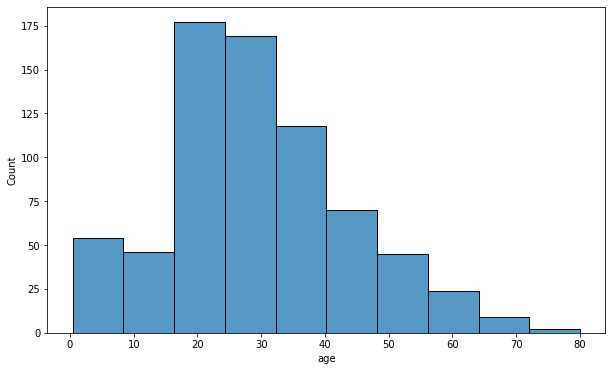

In [5]:
sns.histplot(x = 'age', bins = 10, data = data)

**범주형으로 구분해서 탐색**
- 생존 여부에 따른 연령?

<AxesSubplot:xlabel='age', ylabel='Count'>

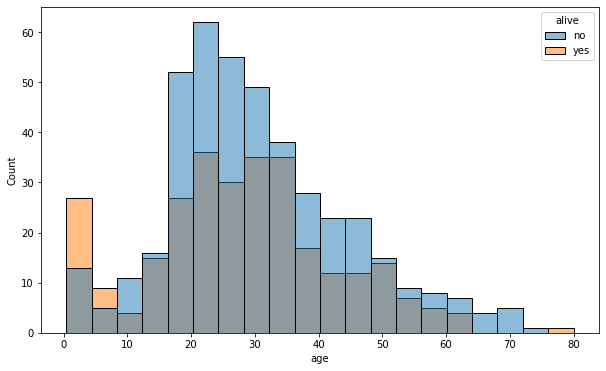

In [6]:
sns.histplot(x = 'age', data = data, hue = 'alive')

포개지지 않고 누적해서 표현하고 싶은 경우 `multiple = 'stack'`옵션 지정 

<AxesSubplot:xlabel='age', ylabel='Count'>

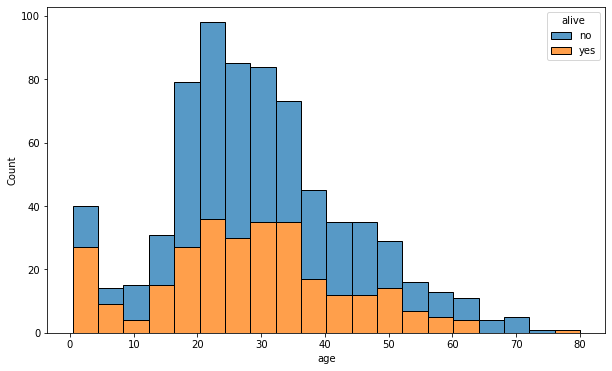

In [7]:
sns.histplot(x = 'age', data = data, hue = 'alive', multiple = 'stack')

## kde plot 
- 실제 EDA과정에서 많이 사용하지는 않음

<AxesSubplot:xlabel='age', ylabel='Density'>

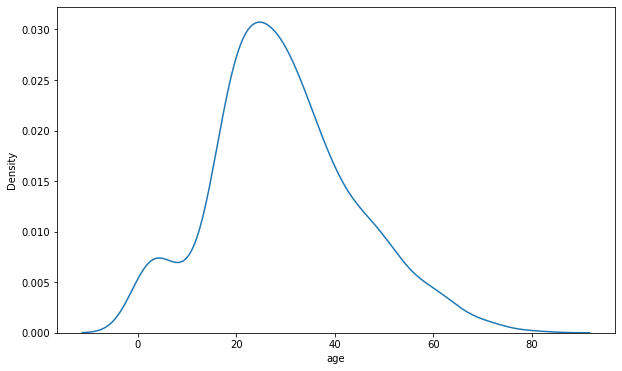

In [8]:
sns.kdeplot(x = 'age', data = data)

생존 여부에 따른 연령의 kdeplot

<AxesSubplot:xlabel='age', ylabel='Density'>

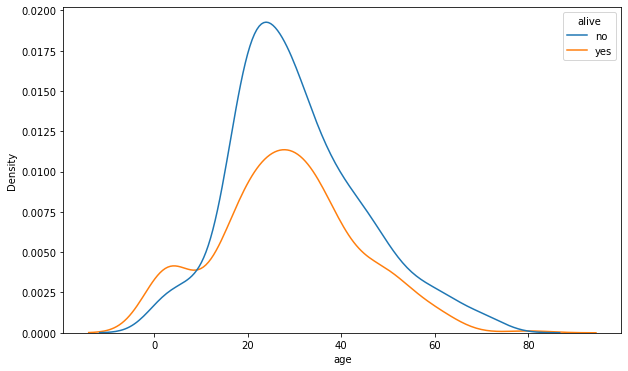

In [9]:
sns.kdeplot(x = 'age', data = data, hue = 'alive')

<AxesSubplot:xlabel='age', ylabel='Density'>

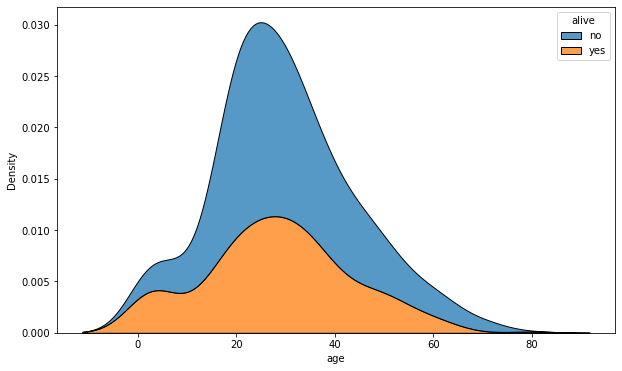

In [10]:
sns.kdeplot(x = 'age', data = data, hue = 'alive', multiple = 'stack')

## displot

파라미터를 기본값으로 두면 히스토그램을 출력

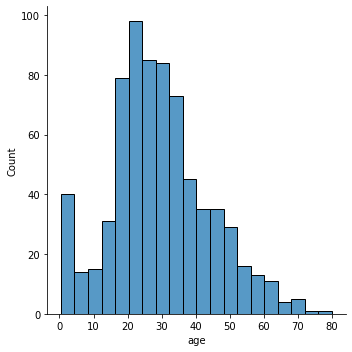

In [11]:
sns.displot(x = 'age', data = data)

kdeplot을 보고싶으면 `kind = 'kde'`옵션 지정

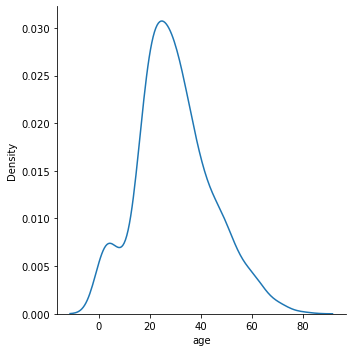

In [12]:
sns.displot(x = 'age', data = data, kind = 'kde')

기본 옵션에 `kde=True`옵션을 주면 히스토그램과 kdeplot을 동시에 출력 가능

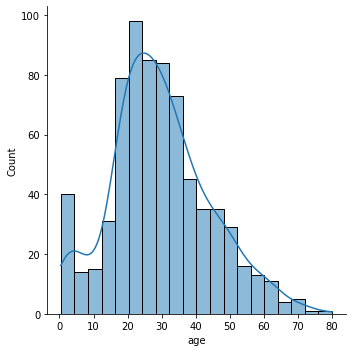

In [13]:
sns.displot(x = 'age', data = data, kde = True)

## rugplot
- marginal distribution을 나타낸다.
- 단독으로 사용하기보다는 주로 다른 분포도 그래프와 함께 사용
- 선분의 밀집도로 분포 확인

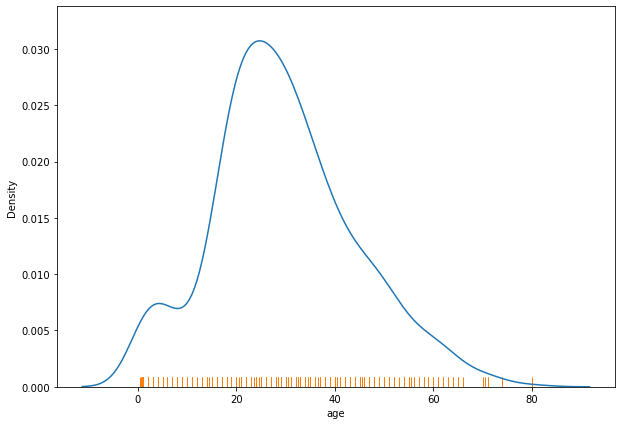

In [14]:
plt.figure(figsize = (10, 7))
sns.kdeplot(x = 'age', data = data)
sns.rugplot(x = 'age', data = data)

plt.show()

# Categorical Variables

## barplot

탑승자 등급별 운임

<AxesSubplot:xlabel='class', ylabel='fare'>

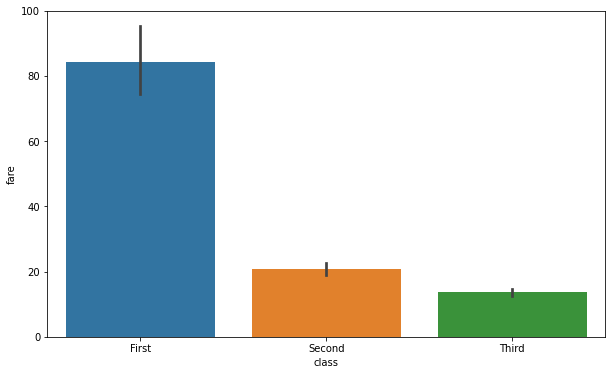

In [15]:
sns.barplot(x = 'class', y = 'fare', data = data)

**평균이 아닌 중앙값, 최댓값, 최솟값을 나타낼 수도 있음**

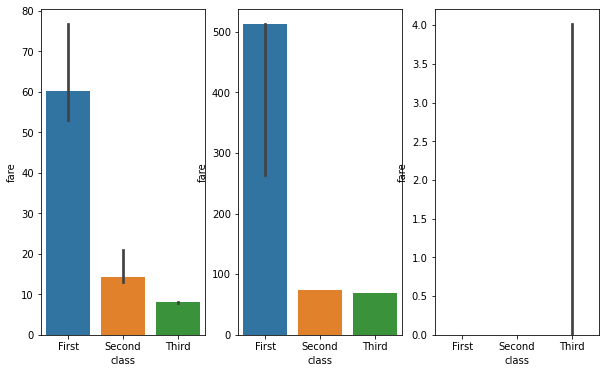

In [32]:
fig, ax = plt.subplots(1, 3)
sns.barplot(x = 'class', y = 'fare', data = data, estimator = np.median, ax = ax[0])
sns.barplot(x = 'class', y = 'fare', data = data, estimator = np.max, ax = ax[1])
sns.barplot(x = 'class', y = 'fare', data = data, estimator = np.min, ax = ax[2])
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## pointplot
- barplot과 모양만 다르고 동일한 기능을 제공
- 그래프를 점과 선으로 표현한다는 점에서 barplot과 차이가 있음 

<AxesSubplot:xlabel='class', ylabel='fare'>

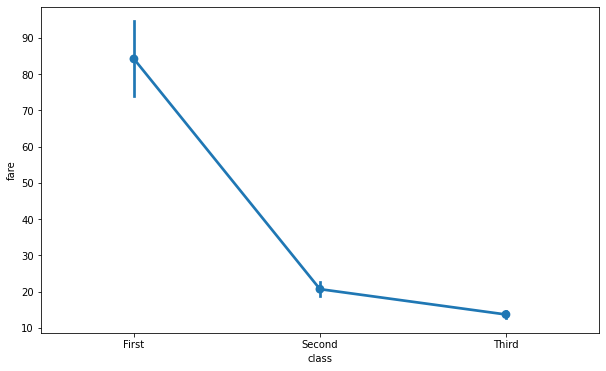

In [16]:
sns.pointplot(x = 'class', y = 'fare', data = data)

**한 화면에 여러 그래프를 그릴 때 pointplot이 유용하게 쓰일 수 있음**

In [19]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


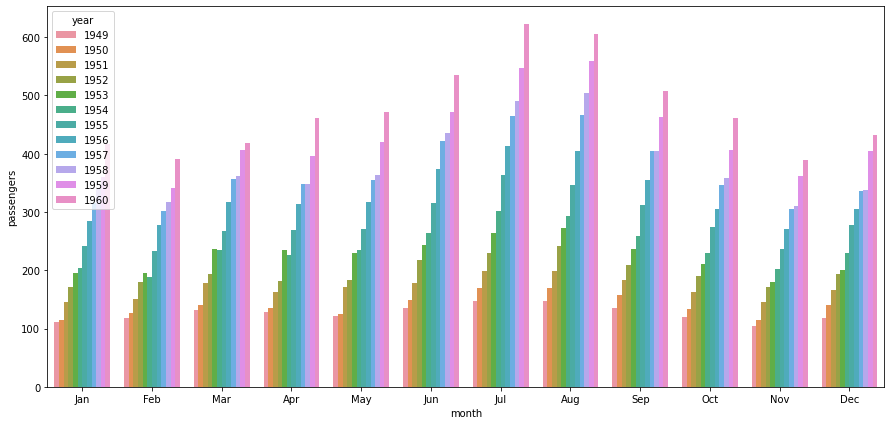

In [20]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'month', y = 'passengers', hue = 'year', data = flights)
plt.show()

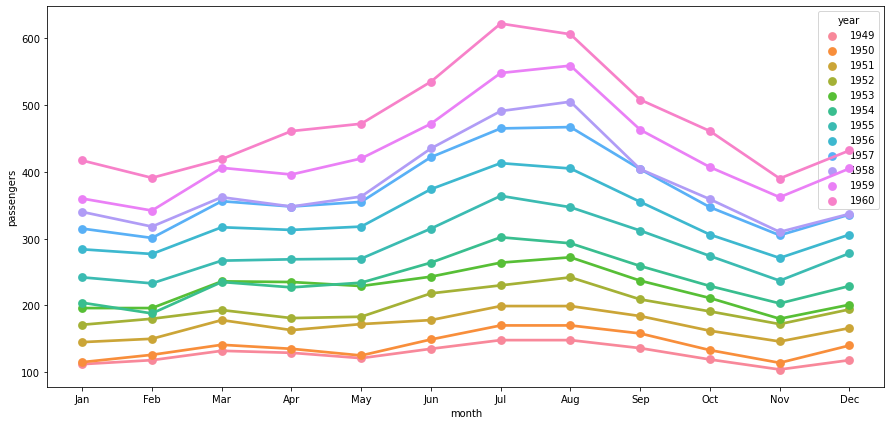

In [21]:
plt.figure(figsize = (15,7))
sns.pointplot(x = 'month', y = 'passengers', hue = 'year', data = flights)
plt.show()

## boxplot

class별 age의 분포

<AxesSubplot:xlabel='class', ylabel='age'>

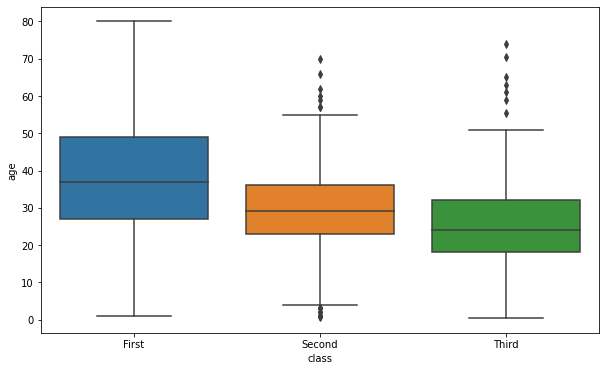

In [22]:
sns.boxplot(x = 'class', y = 'age', data = data)

## violinplot
- boxplot + kdeplot 

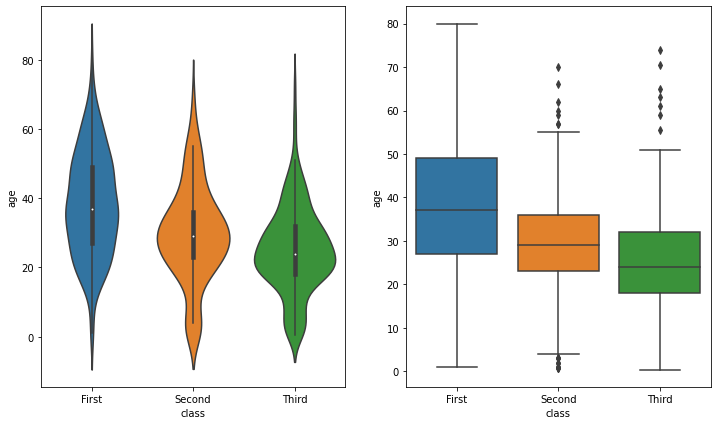

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (12,7))
sns.violinplot(x = 'class', y = 'age', data = data, ax = ax[0])
sns.boxplot(x = 'class', y = 'age', data = data, ax = ax[1])
plt.show()

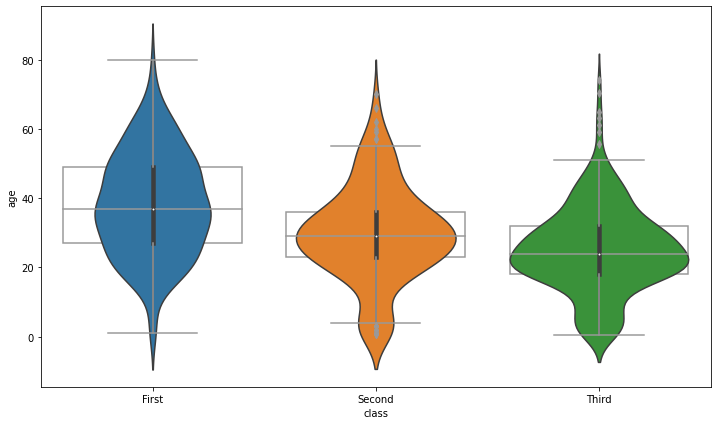

In [24]:
plt.figure(figsize = (12,7))
sns.violinplot(x = 'class', y = 'age', data = data)
sns.boxplot(x = 'class', y = 'age', data = data, color = 'white')
plt.show()

성별에 따른 등급별 나이분포(hue : sex)

<AxesSubplot:xlabel='class', ylabel='age'>

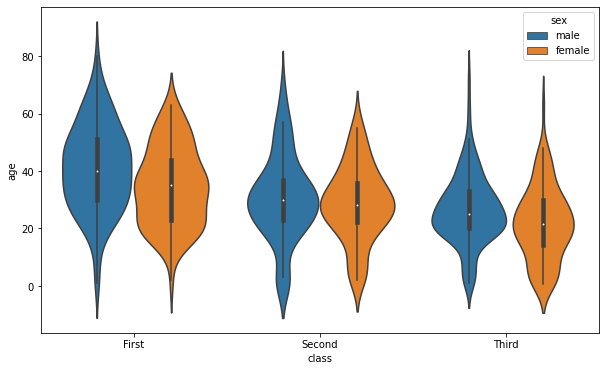

In [25]:
sns.violinplot(x = 'class', y = 'age', hue = 'sex', data = data)

## countplot


<AxesSubplot:xlabel='class', ylabel='count'>

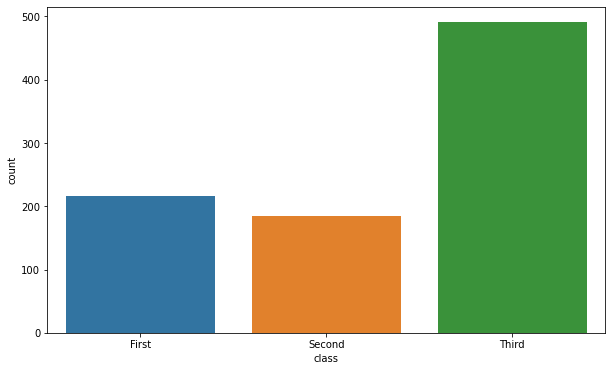

In [26]:
sns.countplot(x = 'class', data = data)

변수를 y에 지정하면 그래프 방향을 바꿀 수 있음 

<AxesSubplot:xlabel='count', ylabel='class'>

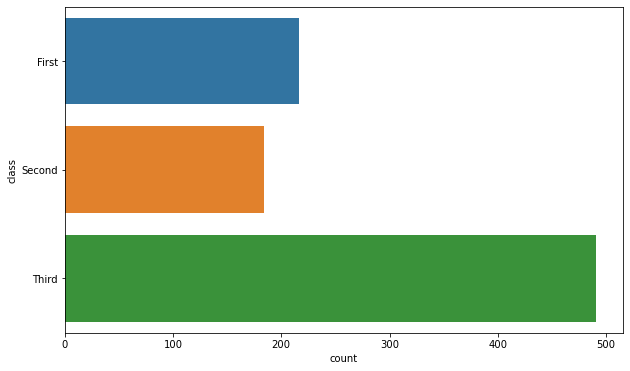

In [27]:
sns.countplot(y = 'class', data = data)

# 데이터 관계 시각화

## heatmap

In [33]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


각 연도의 월별 승객 수를 계산
- month를 행으로, year를 열로, 합산할 데이터를 passenger로 지정

In [34]:
flights_pivot = flights.pivot(index = 'month', 
                              columns = 'year', 
                              values = 'passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

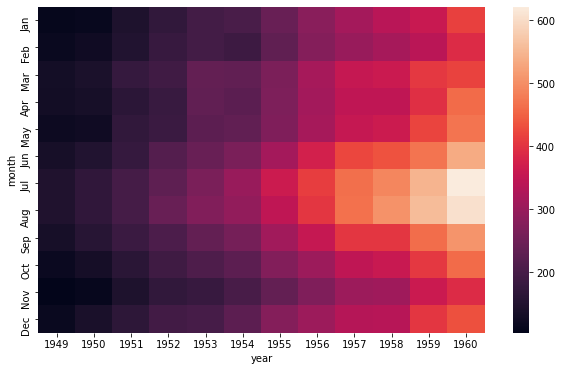

In [35]:
sns.heatmap(flights_pivot)

<AxesSubplot:xlabel='year', ylabel='month'>

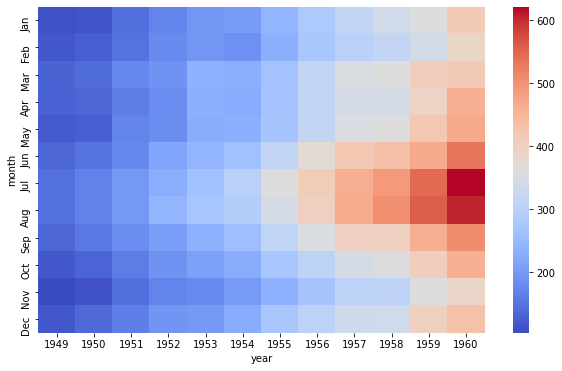

In [39]:
sns.heatmap(flights_pivot, cmap = 'coolwarm')

## lineplot

실선은 평균, 색칠된 영역은 95% 신뢰구간을 나타낸다.

<AxesSubplot:xlabel='year', ylabel='passengers'>

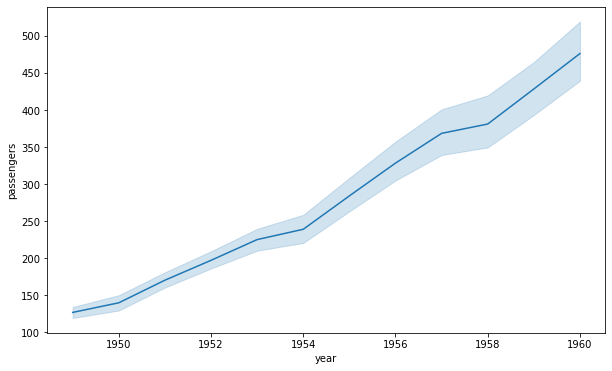

In [63]:
sns.lineplot(x = 'year', y = 'passengers', ci = 95, data = flights)

<AxesSubplot:xlabel='year', ylabel='passengers'>

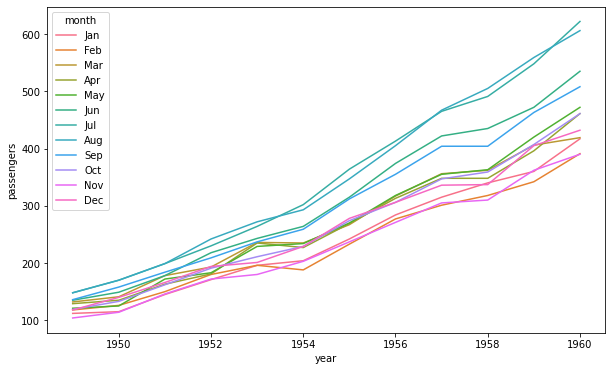

In [44]:
sns.lineplot(x = 'year', y = 'passengers', hue = 'month', data = flights)

## scatterplot

총 금액과 팁 정보를 갖는 tips dataset 이용 

In [45]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 금액과 팁의 관계 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

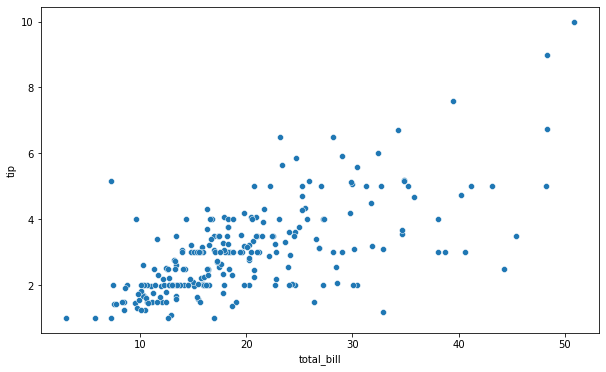

In [46]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

성별에 따른 총 금액과 팁의 관계

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

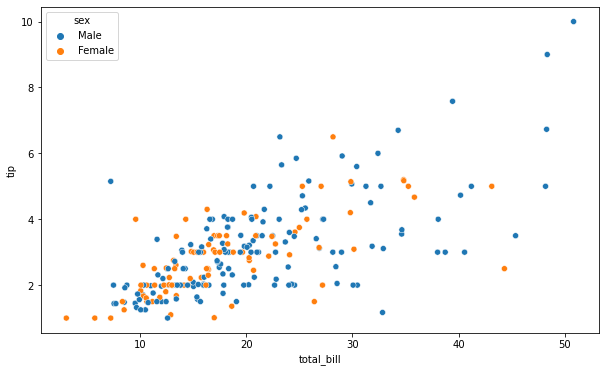

In [47]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

## regplot
- 회귀직선을 포함한 산점도

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

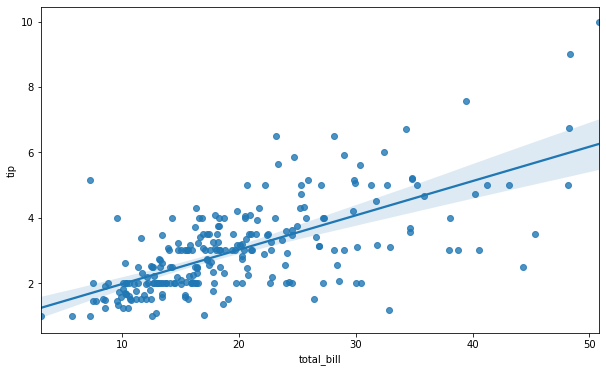

In [50]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

hue는 불가능

In [51]:
sns.regplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

TypeError: regplot() got an unexpected keyword argument 'hue'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

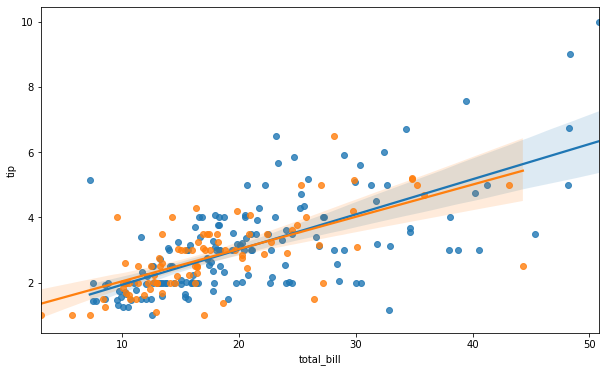

In [54]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips[tips['sex'] == 'Male'])
sns.regplot(x = 'total_bill', y = 'tip', data = tips[tips['sex'] == 'Female'])